<a href="https://colab.research.google.com/github/ToAN7/SIC_AI/blob/TrongKha_/SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

#import thư viện

In [2]:
from sklearn.svm import SVR# mô hình chạy thử
import pandas as pd# lấy dữ liệu
import numpy as np # tính toán
import matplotlib.pyplot as plt # vẽ đồ thị
from sentence_transformers import SentenceTransformer # Doc2Vec với dữ liệu dùng để kiểm thử
from sklearn.cluster import KMeans # Clustering
from sklearn.model_selection import train_test_split # Chia dữ liệu
from sklearn.model_selection import cross_val_score, KFold # đánh giá mô hình
from sklearn.metrics import accuracy_score # đánh giá mô hình
import re # tiền xử lý
import string # tiền xử lý
from sklearn.decomposition import PCA # giảm chiều dữ liệu
from scipy.spatial.distance import pdist, squareform # Tìm tâm cụm
from sklearn.metrics.pairwise import euclidean_distances #tính khoảng cách đầu vào và so sánh với tâm cụm
from sklearn.svm import OneClassSVM # Phân loại
from sklearn.feature_extraction.text import TfidfVectorizer # Tính tfidf
import joblib
import warnings # ngăn cảnh báo vô hại

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


#Hàm

In [36]:
vietnamese_stop_words = [
              'là', 'và', 'có', 'trên', 'cho', 'một', 'các', 'được', 'như', 'với',
              'của', 'ở', 'khi', 'đã', 'còn', 'thì', 'này', 'bởi', 'đó', 'để', 'năm',
              'ngày', 'vào', 'sau', 'tại', 'trong', 'rằng', 'đến', 'từ'
              ]

In [37]:
pca = PCA(n_components=2)

In [38]:
model = SentenceTransformer('/content/drive/MyDrive/SIC/model_doc2vec')

In [39]:
model_kmeans = joblib.load('/content/drive/MyDrive/SIC/kmeans_model.pkl')

In [40]:
#Hàm làm sạch dữ liệu <nên dùng trước khi vector hoá dữ liệu>
def convertData(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+',b'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub(' +', ' ',text)
  text = text.strip()
  text = ' '.join([word for word in text.split() if word not in vietnamese_stop_words])
  return text

<h2>Cosine_similarity

In [41]:
#Hàm tính độ đo cosine
def cosine_similarity(x_vec,y_vec):
  cosine_similarities = []
  for i in range(x_vec.shape[0]):
    cos_sim = (x_vec[i] * y_vec.T).toarray().squeeze()
    cosine_similarities.append(cos_sim)
  return cosine_similarities

In [42]:
#Hàm kiểm thử cho đánh giá độ tương đồng Cosine
def Cosine_sml(lt):
  for i in range(len(data_test)):
    content = [convertData(txt) for txt in data_test[i]['Content']]
    vectors_content = vectorizer.transform(content)
    cosine_similarities = cosine_similarity(vectors_content,real_vectors)
    danhgia_r = 0
    danhgia_fir = 0
    for idx, x in enumerate(cosine_similarities):
      if x.max() > 0.5:
        danhgia_r +=1
        if idx >= len_real[i]:
          danhgia_fir +=1
    print(f'Số lượng tin có khả năng là thật của data_test{i} : {danhgia_r}')
    print(f"Tỉ lệ tin có khả năng là thật data_test{i}: {(danhgia_r)/(len(data_test[i]))}")
    print(f'Độ chênh lệch giữa dự đoán và kết quả số tin thật: {abs(danhgia_r - len_real[i])}')
    print(f"Độ chính xác trong việc dự đoán tin giả data_test{i}: { 1 - (danhgia_fir/(len(data_test[i])-len_real[1] )) } ")
    lt.append(1 - (danhgia_fir/(len(data_test[i])-len_real[1] )))
    print('_____________________________________________________________________________________')
  return lt

<h2> Kmeans </h2>

In [85]:
#hàm này tính ngưỡng cho Kmeans
def caculate_thresholds(model, data, cluster_numb):
  ans = []
  data = pca.fit_transform(data)
  if cluster_numb > model.n_clusters or cluster_numb == None:
    return None
  for i in range(model.n_clusters):
    cluster_ = data[model.labels_ == i]
    distance = model.transform(cluster_)
    min_distance = distance.min(axis=1)
    max_distance = distance.max(axis=1)
    threshold = (max_distance.sum()/len(max_distance)) - (min_distance.sum()/len(min_distance))
    ans.append(threshold)
  return ans

In [86]:
#Hàm dùng của Kmeans
def isTrue(text):
  # list_test.append(text)# nhằm lưu lại các text đã dùng
  propress_text = convertData(text)
  ebd_text = model.encode(propress_text)
  ebd_text = pca.transform(ebd_text.reshape(1,-1))#.reshape(1,-1)
  toadoy = ebd_text[0][1]
  toadox = ebd_text[0][0]
  canhhuyen = np.sqrt(toadox**2 + toadoy**2)
  if canhhuyen > ths[0]:
    return False
  else:
    return True

In [87]:
def Kmeans_danhgia(lt_km, data_test):
  warnings.filterwarnings("ignore", message="X does not have valid feature names, but PCA was fitted with feature names")

  for idx,i in enumerate(data_test):
    dem = 0
    fake_in_real = 0
    for id,j in enumerate(i['Content']):
      if isTrue(j):
        if id >= len_real[idx]:
          fake_in_real += 1
        dem+=1
    print(f'Số lượng tin có khả năng là thật được phát hiện data_test{idx} : {dem}')
    print(f'Số lượng tin bị đánh giá sai : {fake_in_real}')
    print(f"Tỉ số tin có khả năng là thật trong data_test{idx}: {(dem)/300}")
    print(f"Tỉ số phát hiện tin giả trong số lượng tin thật được dự đoán của data_test{idx}: {fake_in_real/(300-len_real[idx])}")
    print(f'Độ chính xác: {1-(fake_in_real/(300-len_real[idx]))}')
    print('_______________________________________________________________')
    lt_km.append(1-(fake_in_real/(300-len_real[idx])))# tỉ lệ đoán được tin có khả năng là giả

In [88]:
def trucquanhoa_Kmeans(data,model_kmeans, ebd_text):

  plt.figure(figsize=(10, 6))

  plt.scatter(data[:,0], data[:, 1], c=model_kmeans.labels_, cmap='cividis')
  plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
  plt.scatter(centroid[0][0],centroid[1][1],marker='o',color='red',s=130)
  plt.scatter(ebd_text[0][0],ebd_text[0][1]+centroid[1][1],marker='o',color='blue',s=20)
  #
  #tìm ra ngưỡng thích hợp làm ngưỡng chung
  circle = plt.Circle((centroid [0][0],centroid[1][1]), radius=ths[0], color='red', fill=False, linestyle='--')
  plt.gca().add_patch(circle)


  ##Vẽ đồ thị để hình dung cách tính khoảng cách

  plt.axvline(x=centroid[0][0], color='r', linestyle='-')
  plt.axhline(y=centroid[1][1],color='blue')

  plt.axhline(y=ebd_text[0][1]+centroid[1][1],color='black')
  plt.axvline(x=ebd_text[0][0], color='r', linestyle='-')
  # plt.axhline(y=ths[0] + centroid[1][1],color='blue')
  # plt.axvline(x=0, color='gray', linestyle='--')
  # plt.axhline(y=0, color='gray', linestyle='--')

  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('K-means Clustering')
  plt.show()

#Gọi dữ liệu test

In [10]:
#Tập dữ liệu gốc ~ dùng với độ đo cosine
real_news = pd.read_csv('/content/drive/MyDrive/Data_/Data_test_300/DATA_.csv')
# 5 tập test
data_test0 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_114_.csv")
data_test1 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_140_.csv")
data_test2 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_155_.csv")
data_test3 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_166_.csv")
data_test4 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_200_.csv")
real_news.drop(columns=['Unnamed: 0'],inplace=True)
data_test0.drop(columns=['Unnamed: 0'],inplace=True)
data_test1.drop(columns=['Unnamed: 0'],inplace=True)
data_test2.drop(columns=['Unnamed: 0'],inplace=True)
data_test3.drop(columns=['Unnamed: 0'],inplace=True)
data_test4.drop(columns=['Unnamed: 0'],inplace=True)
data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]
len_real = [114,140,155,166,200]

#Độ tương đồng Cosine

In [11]:
vectorizer = TfidfVectorizer(max_features=3500)#max_features để 3500 để tránh tình trạng data_test không đủ feature với real_news
real_vectors = vectorizer.fit_transform(real_news['Content'])

In [28]:
lt = list()# để lưu kết quả test
lt_km = list()

In [29]:
Cosine_sml(lt)#

Số lượng tin có khả năng là thật của data_test0 : 121
Tỉ lệ tin có khả năng là thật data_test0: 0.4033333333333333
Độ chênh lệch giữa dự đoán và kết quả số tin thật: 7
Độ chính xác trong việc dự đoán tin giả data_test0: 0.95625 
_____________________________________________________________________________________
Số lượng tin có khả năng là thật của data_test1 : 146
Tỉ lệ tin có khả năng là thật data_test1: 0.4866666666666667
Độ chênh lệch giữa dự đoán và kết quả số tin thật: 6
Độ chính xác trong việc dự đoán tin giả data_test1: 0.9625 
_____________________________________________________________________________________
Số lượng tin có khả năng là thật của data_test2 : 160
Tỉ lệ tin có khả năng là thật data_test2: 0.5333333333333333
Độ chênh lệch giữa dự đoán và kết quả số tin thật: 5
Độ chính xác trong việc dự đoán tin giả data_test2: 0.96875 
_____________________________________________________________________________________
Số lượng tin có khả năng là thật của data_test3 : 170
Tỉ

[0.95625, 0.9625, 0.96875, 0.975, 0.96875]

#Kmeans

In [51]:
data = pd.read_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')
data.drop(columns=['Unnamed: 0'],inplace=True)

In [82]:
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [47]:
# Công đoạn tìm tâm cụm
centroids = model_kmeans.cluster_centers_
# với 4 cụm ta tìm x giữa 2 cụm xa nhau theo trục x và 2 cụm theo trục y
cs1 = centroids[0]
cs2 = centroids[1]
cs3 = centroids[2]
cs4 = centroids[3]
centroid_x = (cs1 + cs2)/2
centroid_y = (cs3 + cs4)/2
centroid = np.array([centroid_x,centroid_y])

In [56]:
#Công đoạn tính ngưỡng cho từng cụm
for i in range(model_kmeans.n_clusters):
  ths = caculate_thresholds(model_kmeans, data, model_kmeans.n_clusters)


In [89]:
Kmeans_danhgia(lt_km,data_test)

Số lượng tin có khả năng là thật được phát hiện data_test0 : 209
Số lượng tin bị đánh giá sai : 107
Tỉ số tin có khả năng là thật trong data_test0: 0.6966666666666667
Tỉ số phát hiện tin giả trong số lượng tin thật được dự đoán của data_test0: 0.5752688172043011
Độ chính xác: 0.4247311827956989
_______________________________________________________________
Số lượng tin có khả năng là thật được phát hiện data_test1 : 219
Số lượng tin bị đánh giá sai : 97
Tỉ số tin có khả năng là thật trong data_test1: 0.73
Tỉ số phát hiện tin giả trong số lượng tin thật được dự đoán của data_test1: 0.60625
Độ chính xác: 0.39375000000000004
_______________________________________________________________
Số lượng tin có khả năng là thật được phát hiện data_test2 : 221
Số lượng tin bị đánh giá sai : 87
Tỉ số tin có khả năng là thật trong data_test2: 0.7366666666666667
Tỉ số phát hiện tin giả trong số lượng tin thật được dự đoán của data_test2: 0.6
Độ chính xác: 0.4
________________________________________

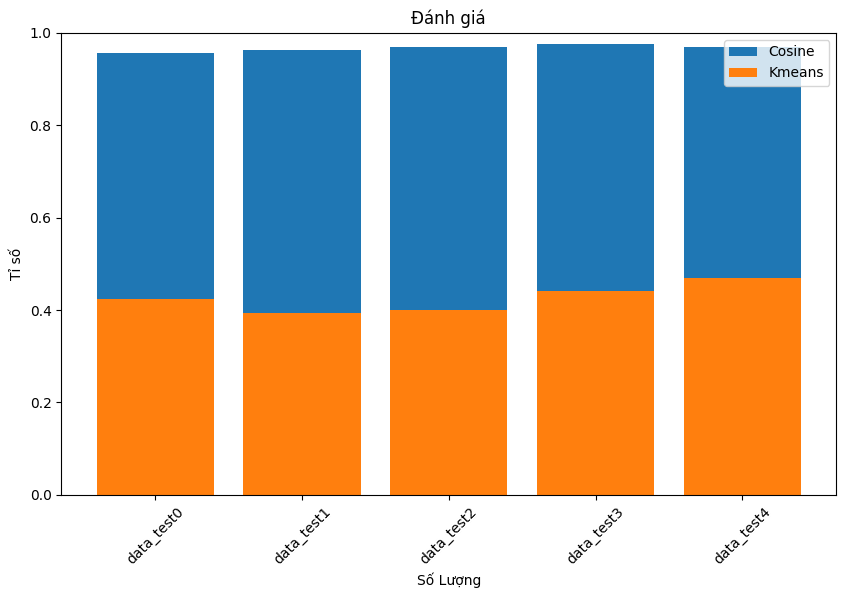

In [91]:
plt.figure(figsize=(10, 6))

plt.bar(['data_test0','data_test1','data_test2','data_test3','data_test4'],lt)
plt.bar(['data_test0','data_test1','data_test2','data_test3','data_test4'],lt_km)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.xlabel('Số Lượng')
plt.ylabel('Tỉ số')
plt.legend(['Cosine','Kmeans'])
plt.title('Đánh giá')
plt.show()